In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

## pi

In [4]:
a = 1
b = 0.83
n = 100000
n0 = 0
pi = np.pi
xrandm = np.random.uniform(0,a/2,n)
phiRan=np.random.uniform(0,pi,n)
subL = xrandm-(0.5*b*np.sin(phiRan))
for i in range(n):
    if subL[i] <= 0 :
        n0 = n0+1
testpi = (2*b)/(a*(n0/n))
print('test pi:',testpi)

test pi: 3.146800121322414


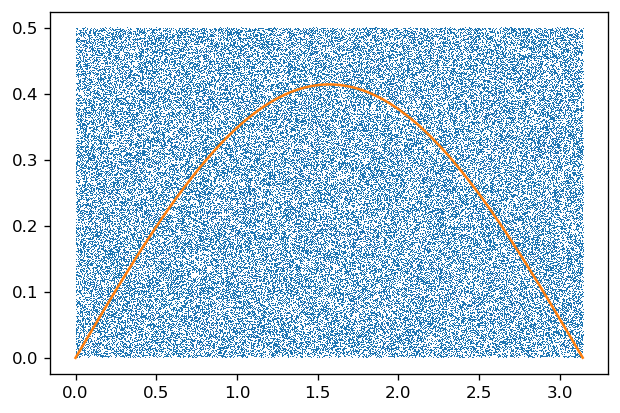

In [5]:
fig = plt.figure(dpi=120)
plt.plot(phiRan,xrandm,',')
plt.plot(np.arange(0, pi, 0.001), (0.5*b*np.sin(np.arange(0, pi, 0.001))), '-')
plt.show()


## exp(-x)

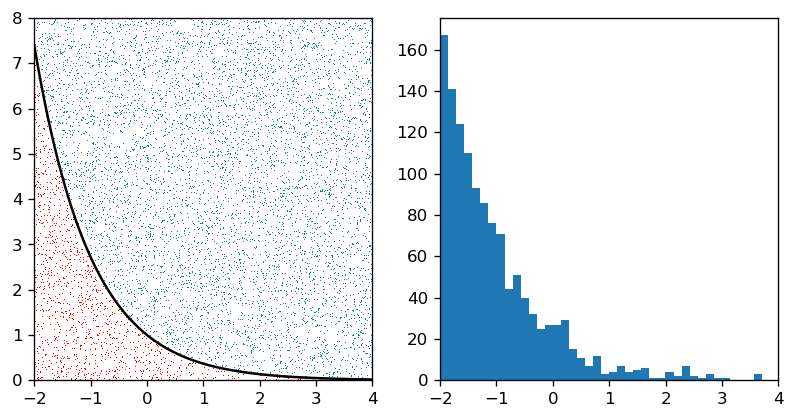

In [136]:
n=2**13
xrandom = np.random.uniform(-2,4,n)
yrandom=np.random.uniform(0,8,n)
tempx=np.exp(-xrandom)
x1L=[]
y1L=[]

for i in range(n):
    if yrandom[i]<tempx[i]:
        x1L.append(xrandom[i])
        y1L.append(yrandom[i])

x1L=np.array(x1L)
hy1,hx1 = np.histogram(x1L,np.unique(np.around(x1L,3)))

fig,axs=plt.subplots(1,2,figsize=[8,4],dpi=120,sharex=True)
axs[0].plot(xrandom,yrandom,',')
axs[0].plot(x1L,y1L,',r')
axs[0].plot(np.arange(-2, 4, 0.01), np.exp(-np.arange(-2, 4, 0.01)),'k')
axs[0].set_ylim(0,8)
axs[1].hist(x1L, 40)
plt.xlim(-2,4)
plt.savefig('exp(-x).jpeg',dpi=120)
plt.show()


In [138]:
n = 1000
n0 = 10000
n1 = 100000
xrandm = np.random.uniform(0, 1, [n0,n])
fexp = np.exp(xrandm)
integ0 = np.sum(fexp,axis=1)/n
integ1 = np.sum(np.exp(np.random.uniform(0,1,[n1,n])),axis=1)/n

In [139]:

print('my test:',np.std(integ1))
print("ppt:",(0.491/np.sqrt(1000)))
fstd = (0.491/np.sqrt(1000))

k0 = 1/np.sqrt(2*np.pi)/fstd

print(np.var(integ1))
print(1/np.sqrt(2*np.pi)/fstd)


my test: 0.01551716211466901
ppt: 0.015526783311426743
0.0002407823200929192
25.693813869859063


In [140]:
y0, x0 = np.histogram(integ0, np.unique(np.around(integ0, 3)),density=True)
y1, x1 = np.histogram(integ1, np.unique(np.around(integ1, 3)), density=True)


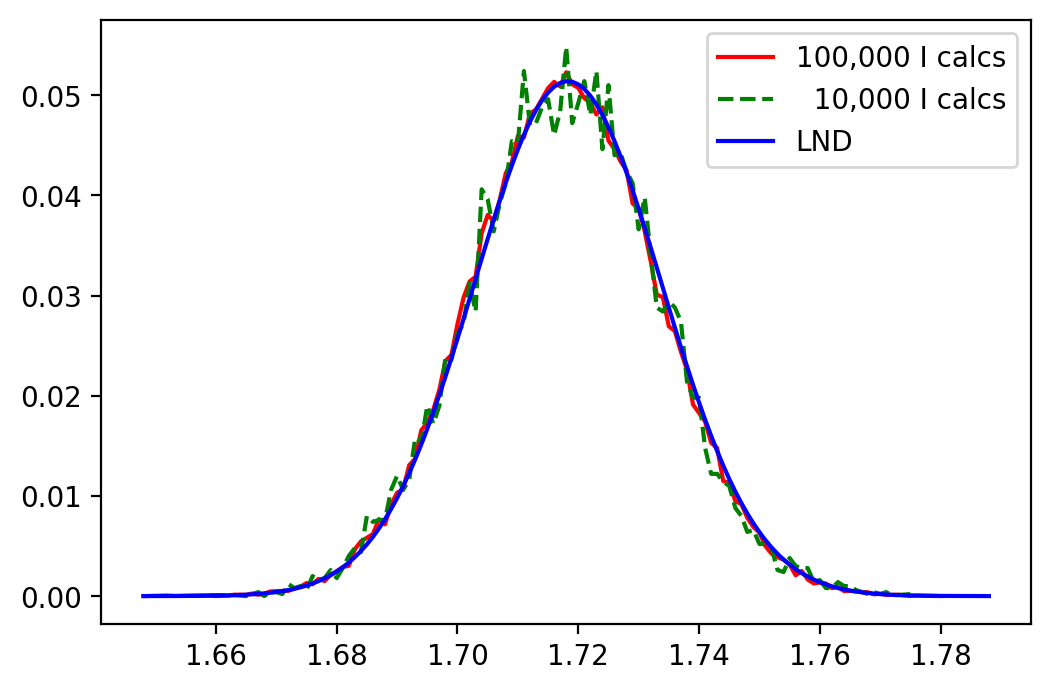

In [141]:
fig = plt.figure(dpi=200)
plt.plot(x1[:-1],y1/n*2,'-r',label='100,000 I calcs')
plt.plot(x0[:-1],y0/n*2,'--g',label='  10,000 I calcs')
plt.plot(x1,np.exp(-(x1-(np.e-1))**2/(2*fstd*fstd))*k0/n*2,'-b',label='LND')
plt.legend()
plt.savefig('LND.jpeg',dpi=180)
plt.show()